# Planck's law

In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import sys
print(sys.executable)   # which environment is used

C:\Users\beck\miniforge3\envs\Jubook\python.exe


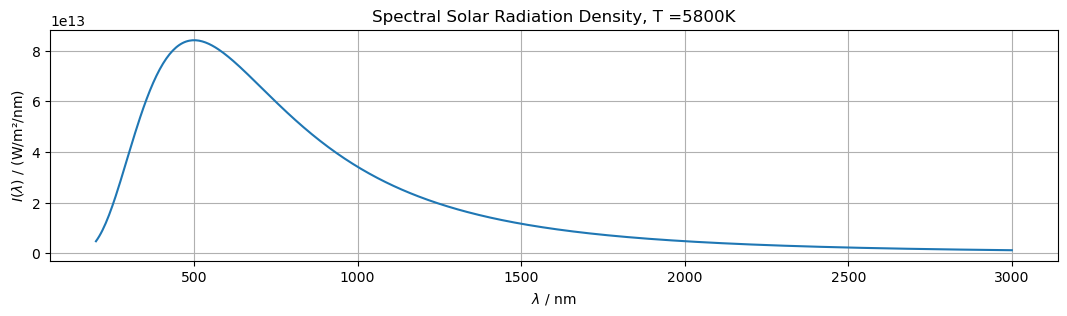

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Planck(lam, T): # Function for Planck law
    # Physikalische Größen alle in SI Einheiten: W, s, m, K
    h = 6.626e-34        # Plancksches Wirkungsquantum
    c = 3e8              # Lichtgeschwindigkeit
    k = 1.38e-23         # Boltzmann-Konstante

    c1  = 2*np.pi*c**2*h
    c2  = c*h/k

    I_lam = c1 / (lam**5 * (np.exp(c2 / (lam*T)) - 1))                            # spektrale Strahlungsflussdichte
    return I_lam

min_L =  200e-9
max_L = 3000e-9
dL    =    5e-9
NL    = int((max_L - min_L) / dL + 1)
lam   = np.linspace(min_L, max_L, NL)
T     = 5800
I     = Planck(lam=lam, T=T)

fig = plt.figure(figsize=(13, 3))
title = 'Spectral Solar Radiation Density, T =' + str(T) + 'K'
plt.title(title)
plt.xlabel('$\lambda$ / nm')
plt.ylabel('$I(\lambda)$ / (W/m²/nm)')
plt.plot(lam * 1e9, I)
plt.grid()
plt.show()

In [3]:
## Wavelength of the maximum, power density
r_S  = 1.393 * 1e6 / 2  # radius of the sun
r_SE = 149597870        # mean distance sun - earth
print('Lambda_max =', round(lam[np.argmax(Planck(lam, T))]*1e9), 'nm')
print('Solar constant =', round(sum(Planck(lam, T)) * (lam[1] - lam[0]) * (r_S / r_SE)**2), 'W/m²')

Lambda_max = 500 nm
Solar constant = 1355 W/m²


## Sensivity curve of the human eye - brightly adapted

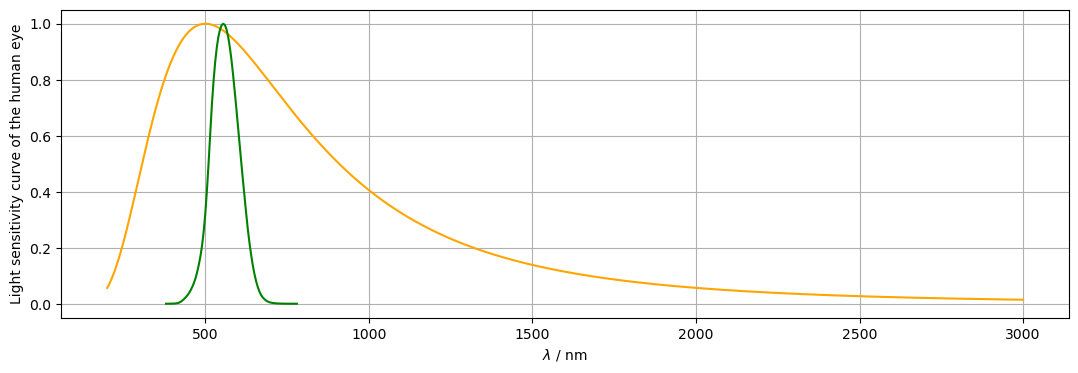

In [4]:
# Due to old DIN related to 555 nm (maximum)
V = np.array([0.039, 0.064, 0.12, 0.217, 0.396, 0.64, 1.21, 2.18, 4.0, 7.3, 11.6,
            16.84, 23, 29.8, 38, 48, 60, 73.9, 90.9, 112.6, 139, 169.3,
            208, 258.6, 323, 407.3, 503, 608, 710, 793, 862, 915, 954,
            980, 995, 1000, 995, 979, 952, 915, 870, 816, 757, 695, 631, 
            567, 503, 441, 381, 321, 265, 217, 175, 138, 107, 81.6, 61,
            44.6, 32, 23.2, 17, 11.9, 8.21, 5.72, 4.10, 2.93, 2.09, 1.48, 1.05,
            0.74, 0.52, 0.36, 0.249, 0.172, 0.12, 0.0848, 0.06, 0.042, 0.03,
            0.021, 0.015]) * 1e-3
N = len(V)
lam_e = np.linspace(380, 780, N) * 1e-9

fig = plt.figure(figsize=(13, 4))
plt.plot(lam * 1e9, I / np.max(I), color='orange')
plt.plot(lam_e * 1e9, V, 'g-')
plt.xlabel('$\lambda$ / nm')
plt.ylabel('Light sensitivity curve of the human eye')
plt.grid()

## Light Efficiency

Definition

$$
  \eta = \frac{\int_0^\infty V(\lambda) \, I(\lambda) \, d\lambda}{\int_0^\infty I(\lambda) \, d\lambda}
$$

In [5]:
# we first create two interpolation functions for V and I, respectively
fint_I   = interp1d(lam, I, kind='linear')
fint_V   = interp1d(lam_e, V, kind='linear', fill_value='extrapolate')
eta = sum(fint_V(lam) * fint_I(lam)) / sum(fint_I(lam))
print('Efficiency =', round(eta * 100), '%')

Efficiency = 14 %
